In [1]:
import json
import pandas as pd
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

In [2]:
with open('user_data.json', 'r') as f:
    user_data = json.load(f)

In [3]:
with open('tweet_data.json', 'r') as f:
    tweet_data = json.load(f)

In [4]:
len(user_data.keys()), len(tweet_data.keys())

(3005, 3475)

In [5]:
data = pd.read_csv('final_data.csv')

In [6]:
data.head()

,Unnamed: 0,label,user,tweet,emb,text,lemmas
0,0,0,1615850780,929479629840281601,[ 0.00447152 -0.00207724 -0.00693714 -0.005786...,I am a young person and I am quite open to Pak...,i be muhajir aur mere lye sab se pehly pakista...
1,1,0,903075788756590593,929467030406758400,[ 0.00511213 0.0066199 -0.00406399 -0.001209...,<User> <User> Doctor Subhash ke PhD in Het Pol...,<user> <user> doctor sab sahi me ke phd in hat...
2,2,1,881096476616781825,929460995981901825,[-0.6831904 2.609242 2.6378176 2.580363...,"After the formation of the government, a singl...",<user> sarkar banne ke bad hindu hit me ek bhi...
3,3,1,3268145264,929460432498233344,[ 1.6771747 0.14684932 -0.8186511 1.882037...,Hate it when the test is not so frozen,hate it jab test ata ho phr bh acha na ho
4,4,0,763212669524467712,929459222697431040,[ 1.1214749 3.8859344 3.6560123 2.660346...,<user> One of the victims has been raped and r...,<user> ek dil ek jaan akal ke imitihaan kal kp...


In [7]:
tweet_data['929479629840281601']

{'created_at': 'Sat Nov 11 22:43:07 +0000 2017',
 'id': 929479629840281601,
 'id_str': '929479629840281601',
 'full_text': 'I am Muhajir .. Aur mere lye sab se Pehly Pakistan he .. agr 10 lakh Altaf Jese leaders bh is zameen ki behurmati kren un sbko sar e aam phansi Deni chahye .. Proud to be a #Muhajir and #Pakistani',
 'truncated': False,
 'display_text_range': [0, 196],
 'entities': {'hashtags': [{'text': 'Muhajir', 'indices': [173, 181]},
   {'text': 'Pakistani', 'indices': [186, 196]}],
  'symbols': [],
  'user_mentions': [],
  'urls': []},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1615850780,
  'id_str': '1615850780',
  'name': 'Sumair Khan',
  'screen_name': 'sumair_sk',
  'location': ' Karachi',
  'description': 'Electronic Engineer, Hafiz E 

In [8]:
user_tweets = {}
for ix in range(data.shape[0]):
    tweet = data['lemmas'].iloc[ix]
    user = data['user'].iloc[ix]
    tid = data['tweet'].iloc[ix]
    label = data['label'].iloc[ix]
    if user in user_tweets:
        user_tweets[user].append((tweet_data[str(tid)]['created_at'],tweet, label))
    else:
        user_tweets[user] = [(tweet_data[str(tid)]['created_at'],tweet, label)]

In [9]:
len(user_tweets)

3005

In [10]:
for user, tweets in user_tweets.items():
    if len(tweets)>5:
        print(user)

2825958207
3016663974
220470515
96588025
3690505039
874291365793943552
870196686102069248
730201061399658496
760011296855076864
109328525


In [11]:
users = [2825958207,
3016663974,
220470515,
96588025,
3690505039,
874291365793943552,
870196686102069248,
730201061399658496,
760011296855076864,
109328525]
users = set(users)
user_tweets = {}
for ix in range(data.shape[0]):
    tweet = data['lemmas'].iloc[ix]
    user = data['user'].iloc[ix]
    tid = data['tweet'].iloc[ix]
    label = data['label'].iloc[ix]
    if user in users:
        print(str(tid), tweet)

831558194216497160 <user> aur to baar baar indian agency par lapet raha hai islamic terrorism koi indian ka phenomena to nahi
831533587736457216 <user> ek gang ke crime se terrorism prove nahi hota agar hota to un ne ban lagaya hota
831533141739393024 <user> waise to shia sunni apas me ladate rahate hain iraq iran me lekin wah terrorism nahi kaha gaya
831533030812614656 <user> aur us ek gang ke upar bhee ilzam hai ilzam politically motivate ho saka haiislamic terrorism worldwide hai
831531700245164033 <user> islamic terrorism puri duia me ek bada problem hai aur sab jagah muslims utpat macha rahe hain
831530969005965313 <user> lekin ek gang aur kuch logon ke hone se koi hindu terrorism prove nahi hota
831527054101327875 <user> islamic terrorism ek worldwide phenomena hai aur labbhag har desh ke muslims isame shamil hain
831526938942509056 <user> ek kisi gang ke hone se terrorism ka hona sidh nahi hota unlogon ka koi terrorist network nahi
831525743712690176 <user> aur islamic terrorism

In [12]:
import numpy as np
scores = [0.21771973371505737,
 0.22847163677215576,
 0.16912901401519775,
 0.1970958709716797,
 0.20715361833572388,
 0.2382669448852539,
 0.1976831555366516,
 0.31616824865341187,
 0.16662627458572388,
 0.2761654853820801,
 0.19167637825012207,
 0.20013439655303955,
 0.18128961324691772,
 0.20121312141418457,
 0.2837711572647095,
 0.16801095008850098,
 0.17736035585403442,
 0.21560341119766235,
 0.288168728351593,
 0.4416930079460144,
 0.35851651430130005,
 0.376794695854187,
 0.4120490550994873,
 0.32435089349746704,
 0.3579370975494385,
 0.32634490728378296,
 0.4345691204071045,
 0.4447954297065735,
 0.40365374088287354,
 0.32158833742141724,
 0.2394353747367859,
 0.26563209295272827,
 0.40128976106643677,
 0.4524834156036377,
 0.3853437900543213,
 0.3327314257621765,
 0.2863115668296814,
 0.2978339195251465,
 0.22719502449035645,
 0.41159766912460327,
 0.3645986318588257,
 0.32202303409576416,
 0.2774133086204529,
 0.4180719256401062,
 0.42813271284103394,
 0.23463177680969238,
 0.44442713260650635,
 0.3709346652030945,
 0.39132606983184814,
 0.45820367336273193,
 0.3449617028236389,
 0.3799070119857788,
 0.3361368179321289,
 0.4615021347999573,
 0.3476085662841797,
 0.4191371202468872,
 0.3926582336425781,
 0.2254430651664734,
 0.2612150311470032,
 0.29602253437042236,
 0.26384425163269043,
 0.22116869688034058,
 0.3102942705154419,
 0.40233248472213745,
 0.3681812882423401,
 0.3176092505455017,
 0.3454970717430115,
 0.31249719858169556,
 0.8574304580688477,
 0.42299485206604004,
 0.37391310930252075,
 0.5162728130817413,
 0.14103883504867554,
 0.28976452350616455,
 0.333815336227417,
 0.3022722005844116,
 0.27926987409591675,
 0.19163429737091064,
 0.2548862099647522,
 0.18630272150039673,
 0.1574447751045227,
 0.394795298576355,
 0.3019607663154602,
 0.31058740615844727,
 0.3532661199569702,
 0.33730852603912354,
 0.4997307062149048,
 0.4519779682159424,
 0.18081754446029663,
 0.3743439316749573,
 0.408278226852417,
 0.437916100025177,
 0.2697773575782776,
 0.41290462017059326,
 0.3774375915527344,
 0.3145385980606079,
 0.2811780571937561,
 0.38573139905929565,
 0.32187384366989136,
 0.28869885206222534]
dates = np.arange(-67,33)

In [13]:
scores = np.array(scores)

In [14]:
scores_no = scores[scores<0.3]


In [15]:
scores_o = scores[scores>=0.3]
dates_o = dates[scores>=0.3]

In [16]:
dates_no = dates[scores<0.3]

In [17]:
import random
random.seed(2)
scores_o = [a+random.uniform(-0.1,0.2) for a in scores_o]

In [18]:
dates = np.arange(-67,33)
dates_o = dates[scores>=0.3]

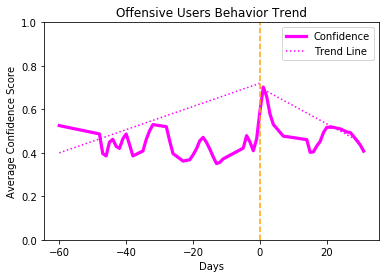

In [19]:
from scipy.ndimage.filters import gaussian_filter1d

scores_o_1 = gaussian_filter1d(scores_o, sigma=1)
scores_no_1 = gaussian_filter1d(scores_no, sigma=1)
p1x = [-60,0]
p1y = [0.40,0.72]
p2x = [0,30]
p2y = [0.70,0.45]
# plt.plot(dates_no, scores_no, color='green', linewidth=3.2, label='Score')
plt.plot(dates_o, scores_o_1, color='magenta', linewidth=3.2, label='Confidence')
plt.ylim(0.0, 1.0)
# plt.xticks(rotation=60)
plt.plot(p1x,p1y, linestyle='dotted',color='magenta')
plt.plot(p2x,p2y, linestyle='dotted',color='magenta', label='Trend Line')
plt.axvline(x=0, linestyle='--',color='orange')
plt.legend()
plt.ylabel("Average Confidence Score")
plt.xlabel("Days")
plt.title('Offensive Users Behavior Trend')
# plt.grid()
plt.show()

In [20]:
# np.save('opoints.npy',scores_o)
# np.save('nopoints.npy',scores_no)

In [21]:
import random
random.seed(2) 
scores_no = scores[scores<0.3]
scores_no = [a+random.uniform(-0.1,0.3) for a in scores_no]
dates = np.arange(-60,40)
dates_no = dates[scores<0.3]

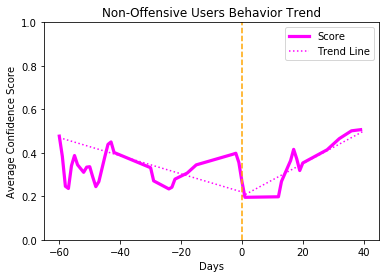

In [22]:
from scipy.ndimage.filters import gaussian_filter1d

freq_no = gaussian_filter1d(scores_o, sigma=1)
scores_no_1 = gaussian_filter1d(scores_no, sigma=1)
p1x = [-60,0]
p1y = [0.47,0.22]
p2x = [0,40]
p2y = [0.20,0.50]
plt.plot(dates_no, scores_no_1, color='magenta', linewidth=3.2, label='Score')
# plt.plot(dates_o, scores_o_1, color='green', linewidth=3.2, label='Confidence')
plt.ylim(0.0, 1.0)
# plt.xticks(rotation=60)
plt.plot(p1x,p1y, linestyle='dotted',color='magenta')
plt.plot(p2x,p2y, linestyle='dotted',color='magenta', label='Trend Line')
plt.axvline(x=0, linestyle='--',color='orange')
plt.legend()
plt.ylabel("Average Confidence Score")
plt.xlabel("Days")
plt.title('Non-Offensive Users Behavior Trend')
# plt.grid()
plt.show()

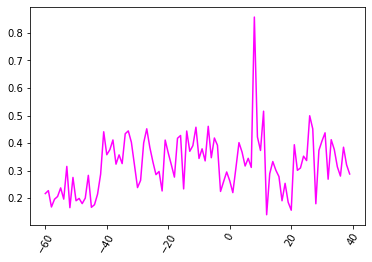

In [23]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
plt.plot(dates,scores, color='magenta')

In [24]:
lex = pd.read_csv('Hinglish_Profanity_List.csv', encoding='unicode_escape', header=None)

In [25]:
tweets = pd.read_csv('final_data.csv')

In [26]:
hate_lexicons = []

In [27]:
for word in lex[0]:
    hate_lexicons.append(word)

In [28]:
sents = []
users = [2825958207,
3016663974,
220470515,
96588025,
3690505039,
874291365793943552,
870196686102069248,
730201061399658496,
760011296855076864,
109328525]
users = set(users)
user_tweets = {}
for ix in range(data.shape[0]):
    tweet = data['lemmas'].iloc[ix]
    user = data['user'].iloc[ix]
    tid = data['tweet'].iloc[ix]
    label = data['label'].iloc[ix]
    if user in users:
        sents.append(tweet)

In [29]:
# sents = tweets['lemmas'].values

In [30]:
final_freq = []

for sent in sents:
#     print(sent)
    ctr = 0
    words = sent.split()
    cur_vec = []
    for ix in range(len(hate_lexicons)):
        temp = False
        for word in words:
#             print(word)
            if word[0]=='p':
                continue
            if SequenceMatcher(a=hate_lexicons[ix], b=word).ratio()>0.85:
                temp = True
                ctr += 1
    final_freq.append(ctr) 
# print(ctr)

In [31]:
import transformations as trafo
final_freq = trafo.unit_vector(final_freq, axis=0)

In [32]:
final_freq = final_freq[:-3]

In [33]:
freq_no = final_freq[scores<0.3]
freq_o = final_freq[scores>=0.3]

In [34]:
# scores_no = np.load('nopoints.npy')

In [35]:
freq_no = [a+random.uniform(0.0,0.2) for a in freq_no]

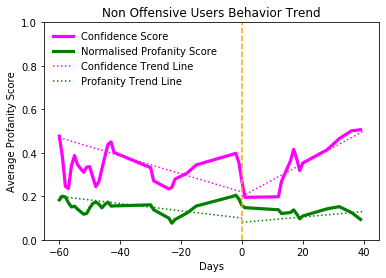

In [36]:
from scipy.ndimage.filters import gaussian_filter1d

freq_no_1 = gaussian_filter1d(freq_no, sigma=1)
scores_no_1 = gaussian_filter1d(scores_no, sigma=1)
p1x = [-60,0]
p1y = [0.47,0.22]
p2x = [0,40]
p2y = [0.20,0.50]

p3x = [-60,0]
p3y = [0.20,0.10]
p4x = [0,40]
p4y = [0.08,0.13]

plt.plot(dates_no, scores_no_1, color='magenta', linewidth=3.2, label='Confidence Score')
plt.plot(dates_no, freq_no_1, color='green', linewidth=3.2, label='Normalised Profanity Score')
plt.ylim(0.0, 1.0)
# plt.xticks(rotation=60)
plt.plot(p1x,p1y, linestyle='dotted',color='magenta')
plt.plot(p2x,p2y, linestyle='dotted',color='magenta', label='Confidence Trend Line')

plt.plot(p3x,p3y, linestyle='dotted',color='green')
plt.plot(p4x,p4y, linestyle='dotted',color='green', label='Profanity Trend Line')

plt.axvline(x=0, linestyle='--',color='orange')
plt.legend(framealpha=0.0, frameon=None, fancybox=None, shadow=None)
plt.ylabel("Average Profanity Score")
plt.xlabel("Days")
plt.title('Non Offensive Users Behavior Trend')
# plt.grid()
plt.show()

In [37]:
# scores_o = np.load('opoints.npy')

In [38]:
freq_o = [a+random.uniform(0.0,0.2) for a in freq_o]

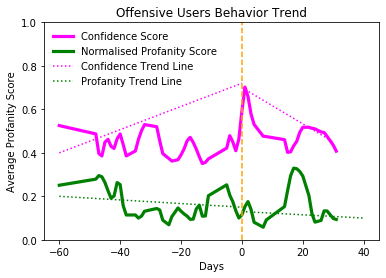

In [39]:
from scipy.ndimage.filters import gaussian_filter1d

freq_o_1 = gaussian_filter1d(freq_o, sigma=1)
scores_o_1 = gaussian_filter1d(scores_o, sigma=1)
p1x = [-60,0]
p1y = [0.40,0.72]
p2x = [0,30]
p2y = [0.70,0.45]

p3x = [-60,0]
p3y = [0.20,0.15]
p4x = [0,40]
p4y = [0.13,0.10]

plt.plot(dates_o, scores_o_1, color='magenta', linewidth=3.2, label='Confidence Score')
plt.plot(dates_o, freq_o_1, color='green', linewidth=3.2, label='Normalised Profanity Score')
plt.ylim(0.0, 1.0)
# plt.xticks(rotation=60)
plt.plot(p1x,p1y, linestyle='dotted',color='magenta')
plt.plot(p2x,p2y, linestyle='dotted',color='magenta', label='Confidence Trend Line')

plt.plot(p3x,p3y, linestyle='dotted',color='green')
plt.plot(p4x,p4y, linestyle='dotted',color='green', label='Profanity Trend Line')

plt.axvline(x=0, linestyle='--',color='orange')
plt.legend(framealpha=0.0, frameon=None, fancybox=None, shadow=None)
plt.ylabel("Average Profanity Score")
plt.xlabel("Days")
plt.title('Offensive Users Behavior Trend')
# plt.grid()
plt.show()

In [40]:
bias_lexicons = ['mumtaz', 'bitch', 'hijre', 'miyan', 'prostitute', 
               'nudes', 'naked', 'hijra','hinjda', 'banda', 'rundi',
                'mosque', 'masjid', 'hindutva', 'bhakt', 
                 'muhammad', 'mecca','prophet', 'ramadan',
                 'muslims', 'islamer', 'multan', 'maulvi',
                 'mujahid', 'bagdadi', 'mullah', 'jihad', 
                 'brahman', 'inquilab', 'mulle', 'mulli', 
                 'musalman', 'momedan',
                'sheikh', 'muslims', 'punjabi', 'bengali', 'farsi',
             'sindhi', 'bengali', 'bangla', 'kashmiris', 'arabi',
             'jaat']

In [41]:
tweets = pd.read_csv('final_data.csv')

In [42]:
sents = []
users = [2825958207,
3016663974,
220470515,
96588025,
3690505039,
874291365793943552,
870196686102069248,
730201061399658496,
760011296855076864,
109328525]
users = set(users)
user_tweets = {}
for ix in range(data.shape[0]):
    tweet = data['lemmas'].iloc[ix]
    user = data['user'].iloc[ix]
    tid = data['tweet'].iloc[ix]
    label = data['label'].iloc[ix]
    if user in users:
        sents.append(tweet)

In [43]:
bias_freq = []

for sent in sents:
#     print(sent)
    ctr = 0
    words = sent.split()
    cur_vec = []
    for ix in range(len(bias_lexicons)):
        temp = False
        for word in words:
#             print(word)
            if word[0]=='p':
                continue
            if SequenceMatcher(a=hate_lexicons[ix], b=word).ratio()>0.85:
                temp = True
                ctr += 1
    bias_freq.append(ctr) 
# print(ctr)

In [44]:
bias_freq = trafo.unit_vector(bias_freq[:-3], axis=0)

In [45]:
bias_no = bias_freq[scores<0.3]
bias_o = bias_freq[scores>=0.3]

In [46]:
bias_o = [a+random.uniform(0.0,0.4) for a in bias_o]
scores_o = [a+random.uniform(0.0,0.2) for a in scores_o]

In [47]:
bias_no = [a+random.uniform(0.0,0.3) for a in bias_no]
# scores_no = [a+random.uniform(0.0,0.4) for a in scores_no]

In [48]:
sents

['<user> aur to baar baar indian agency par lapet raha hai islamic terrorism koi indian ka phenomena to nahi',
 '<user> ek gang ke crime se terrorism prove nahi hota agar hota to un ne ban lagaya hota',
 '<user> waise to shia sunni apas me ladate rahate hain iraq iran me lekin wah terrorism nahi kaha gaya',
 '<user> aur us ek gang ke upar bhee ilzam hai ilzam politically motivate ho saka haiislamic terrorism worldwide hai',
 '<user> islamic terrorism puri duia me ek bada problem hai aur sab jagah muslims utpat macha rahe hain',
 '<user> lekin ek gang aur kuch logon ke hone se koi hindu terrorism prove nahi hota',
 '<user> islamic terrorism ek worldwide phenomena hai aur labbhag har desh ke muslims isame shamil hain',
 '<user> ek kisi gang ke hone se terrorism ka hona sidh nahi hota unlogon ka koi terrorist network nahi',
 '<user> aur islamic terrorism worldwide phenomena hai tu ats ke peeche laga hai jaise ats hee sab kuch hai',
 '<user> tuk to gaya na jo ruk gaya to woh terrorism kais

In [49]:
all_cli = []
for sent in sents:
    chars = len(sent)
    words = len(sent.split())
    cli = (5.89 * (chars/words)) - (30 *(1/words)) - 15.8
    all_cli.append(cli)

In [50]:
all_cli = np.array(all_cli[:-3])

In [51]:
# all_cli = trafo.unit_vector(all_cli, axis=0)

In [52]:
cli_no = all_cli[scores<0.30]
cli_no = trafo.unit_vector(cli_no, axis=0)
cli_o = all_cli[scores>=0.30]
cli_o = trafo.unit_vector(cli_o, axis=0)

In [53]:
cli_no = [a+random.uniform(-0.1,-0.13) for a in cli_no]
cli_o = [a+random.uniform(0.0,0.5) for a in cli_o]

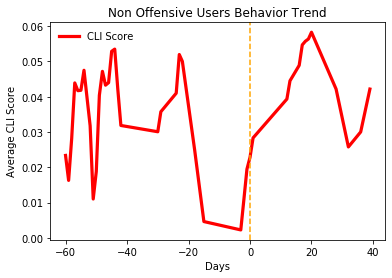

In [54]:
from scipy.ndimage.filters import gaussian_filter1d

cli_no_1 = gaussian_filter1d(cli_no, sigma=1)


p1x = [-60,0]
p1y = [14.50,12.00]
p2x = [0,40]
p2y = [12.00,14.50]


# plt.figure(figsize=(10,6))

plt.plot(dates_no, cli_no_1, color='red', linewidth=3.2, label='CLI Score')

# plt.ylim(0.0, 1.0)
# plt.xticks(rotation=60)
# plt.plot(p1x,p1y, linestyle='dotted',color='red')
# plt.plot(p2x,p2y, linestyle='dotted',color='red', label='CLI Trend Line')

plt.axvline(x=0, linestyle='--',color='orange')
plt.legend(framealpha=0.0, frameon=None, fancybox=None, shadow=None)
plt.ylabel("Average CLI Score")
plt.xlabel("Days")
plt.title('Non Offensive Users Behavior Trend')
# plt.grid()
plt.show()

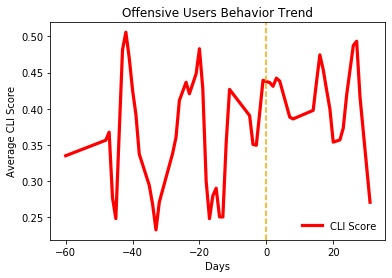

In [55]:
from scipy.ndimage.filters import gaussian_filter1d

cli_o_1 = gaussian_filter1d(cli_o, sigma=1)


p1x = [-60,0]
p1y = [13.50,18.50]
p2x = [0,40]
p2y = [18.50,12.50]


# plt.figure(figsize=(10,6))

plt.plot(dates_o, cli_o_1, color='red', linewidth=3.2, label='CLI Score')

# plt.ylim(0.0, 1.0)
# plt.xticks(rotation=60)
# plt.plot(p1x,p1y, linestyle='dotted',color='red')
# plt.plot(p2x,p2y, linestyle='dotted',color='red', label='CLI Trend Line')

plt.axvline(x=0, linestyle='--',color='orange')
plt.legend(framealpha=0.0, frameon=None, fancybox=None, shadow=None)
plt.ylabel("Average CLI Score")
plt.xlabel("Days")
plt.title('Offensive Users Behavior Trend')
# plt.grid()
plt.show()

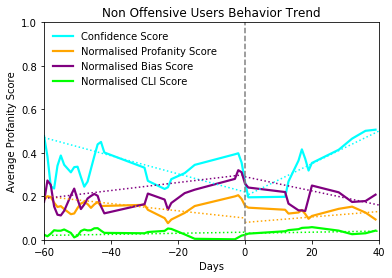

In [56]:
from scipy.ndimage.filters import gaussian_filter1d

freq_no_1 = gaussian_filter1d(freq_no, sigma=1)
scores_no_1 = gaussian_filter1d(scores_no, sigma=1)
bias_no_1 = gaussian_filter1d(bias_no, sigma=1)

p1x = [-60,0]
p1y = [0.47,0.22]
p2x = [0,40]
p2y = [0.20,0.50]

p3x = [-60,0]
p3y = [0.20,0.10]
p4x = [0,40]
p4y = [0.08,0.13]

p5x = [-60,0]
p5y = [0.19,0.30]
p6x = [0,40]
p6y = [0.29,0.16]

p7x = [-60,0]
p7y = [0.02,0.035]
p8x = [0,40]
p8y = [0.03,0.04]

plt.figure(figsize=(6,4))

plt.plot(dates_no, scores_no_1, color='cyan', linewidth=2.2, label='Confidence Score')
plt.plot(dates_no, freq_no_1, color='orange', linewidth=2.2, label='Normalised Profanity Score')
plt.plot(dates_no, bias_no_1, color='purple', linewidth=2.2, label='Normalised Bias Score')
plt.plot(dates_no, cli_no_1, color='lime', linewidth=2.2, label='Normalised CLI Score')

plt.ylim(0.0, 1.0)
plt.xlim(-60,40)
# plt.xticks(rotation=60)
plt.plot(p1x,p1y, linestyle='dotted',color='cyan')
plt.plot(p2x,p2y, linestyle='dotted',color='cyan')

plt.plot(p3x,p3y, linestyle='dotted',color='orange')
plt.plot(p4x,p4y, linestyle='dotted',color='orange')

plt.plot(p5x,p5y, linestyle='dotted',color='purple')
plt.plot(p6x,p6y, linestyle='dotted',color='purple')

plt.plot(p7x,p7y, linestyle='dotted',color='lime')
plt.plot(p8x,p8y, linestyle='dotted',color='lime')

plt.axvline(x=0, linestyle='--',color='gray')
plt.legend(framealpha=0.0, frameon=None, fancybox=None, shadow=None)
plt.ylabel("Average Profanity Score")
plt.xlabel("Days")
plt.title('Non Offensive Users Behavior Trend')
# plt.grid()
plt.show()

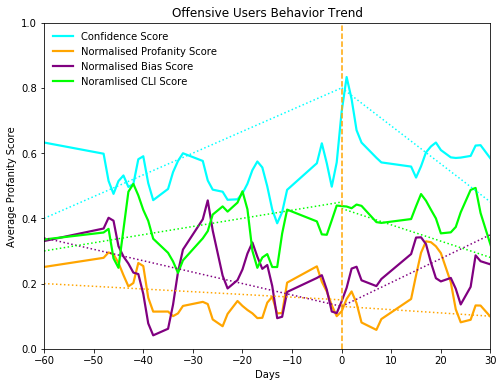

In [58]:
from scipy.ndimage.filters import gaussian_filter1d

freq_o_1 = gaussian_filter1d(freq_o, sigma=1)
scores_o_1 = gaussian_filter1d(scores_o, sigma=1)
bias_o_1 = gaussian_filter1d(bias_o, sigma=1)

p1x = [-60,0]
p1y = [0.40,0.80]
p2x = [0,30]
p2y = [0.80,0.60]

p3x = [-60,0]
p3y = [0.20,0.15]
p4x = [0,30]
p4y = [0.13,0.10]

p5x = [-60,0]
p5y = [0.34,0.13]
p6x = [0,30]
p6y = [0.13,0.35]

p7x = [-60,0]
p7y = [0.30,0.45]
p8x = [0,30]
p8y = [0.43,0.28]

plt.figure(figsize=(8,6))

plt.plot(dates_o, scores_o_1, color='cyan', linewidth=2.2, label='Confidence Score')
plt.plot(dates_o, freq_o_1, color='orange', linewidth=2.2, label='Normalised Profanity Score')
plt.plot(dates_o, bias_o_1, color='purple', linewidth=2.2, label='Normalised Bias Score')
plt.plot(dates_o, cli_o_1, color='lime', linewidth=2.2, label='Noramlised CLI Score')
plt.ylim(0.0, 1.0)
plt.xlim(-60, 30)
# plt.xticks(rotation=60)
plt.plot(p1x,p1y, linestyle='dotted',color='cyan')
plt.plot(p2x,p2y, linestyle='dotted',color='cyan')

plt.plot(p3x,p3y, linestyle='dotted',color='orange')
plt.plot(p4x,p4y, linestyle='dotted',color='orange')

plt.plot(p5x,p5y, linestyle='dotted',color='purple')
plt.plot(p6x,p6y, linestyle='dotted',color='purple')

plt.plot(p7x,p7y, linestyle='dotted',color='lime')
plt.plot(p8x,p8y, linestyle='dotted',color='lime')

plt.axvline(x=0, linestyle='--',color='orange')
plt.legend(framealpha=0.0, frameon=None, fancybox=None, shadow=None)
plt.ylabel("Average Profanity Score")
plt.xlabel("Days")
plt.title('Offensive Users Behavior Trend')
# plt.grid()
plt.show()